# Exam 1

In this exam, you will work with a data set of 50000 used cars sold in the United States in 2018. The data set is available here:

`https://raw.githubusercontent.com/dlsun/data-science-book/master/data/usedcars.csv`

Answer the 8 questions below. The point values are clearly indicated next to each question. There are 30 possible points.

Some of the questions are deliberately vague. If you are not sure whether your answer is acceptable, make sure you document your thought process thoroughly in your explanation.

In [1]:
# Import packages.
import pandas as pd
import numpy as np
%matplotlib inline
# Read in the data set.
cars_df = pd.read_csv("https://raw.githubusercontent.com/dlsun/data-science-book/master/data/usedcars.csv")
cars_df[["City", "State", "Make", "Model"]] = (
    cars_df[["City", "State", "Make", "Model"]]
    .apply(lambda s: s.str.strip().str.upper()))
cars_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,27947,2010,84925,SAN ANTONIO,TX,JTJJM7FX5A5009042,LEXUS,GX
1,16850,2010,76863,RICHARDSON,TX,WDDHF5GB9AA106034,MERCEDES-BENZ,E-CLASS4DR
2,34974,2017,9978,BUFFALO GROVE,IL,1FM5K8F82HGC23716,FORD,EXPLORER4WD
3,28997,2014,40480,WILLIAMSBURG,VA,1C4RJFBG9EC506630,JEEP,GRAND
4,12499,2015,21849,DOWNERS GROVE,IL,1FADP3K24FL209932,FORD,FOCUSHATCHBACK


# Question 1 (3 points)

How is the mileage on a car related to its price? Make a visualization and report a summary statistic. What general trend do you notice?

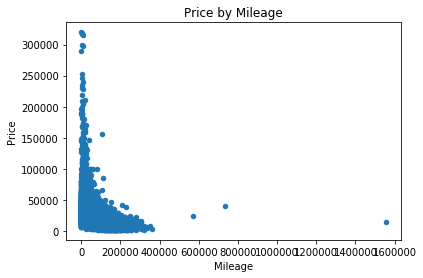

In [16]:
cars_df.plot.scatter(x="Mileage", y="Price", title="Price by Mileage")

In [3]:
cars_df["Mileage"].corr(cars_df["Price"])

-0.42496508318289578

Mileage and price have a moderate negative relationship. That is, as the mileage on the car goes up, its price goes down.

# Question 2 (3 points)

Make a visualization that shows the average price of a car by year. What general trend do you notice?

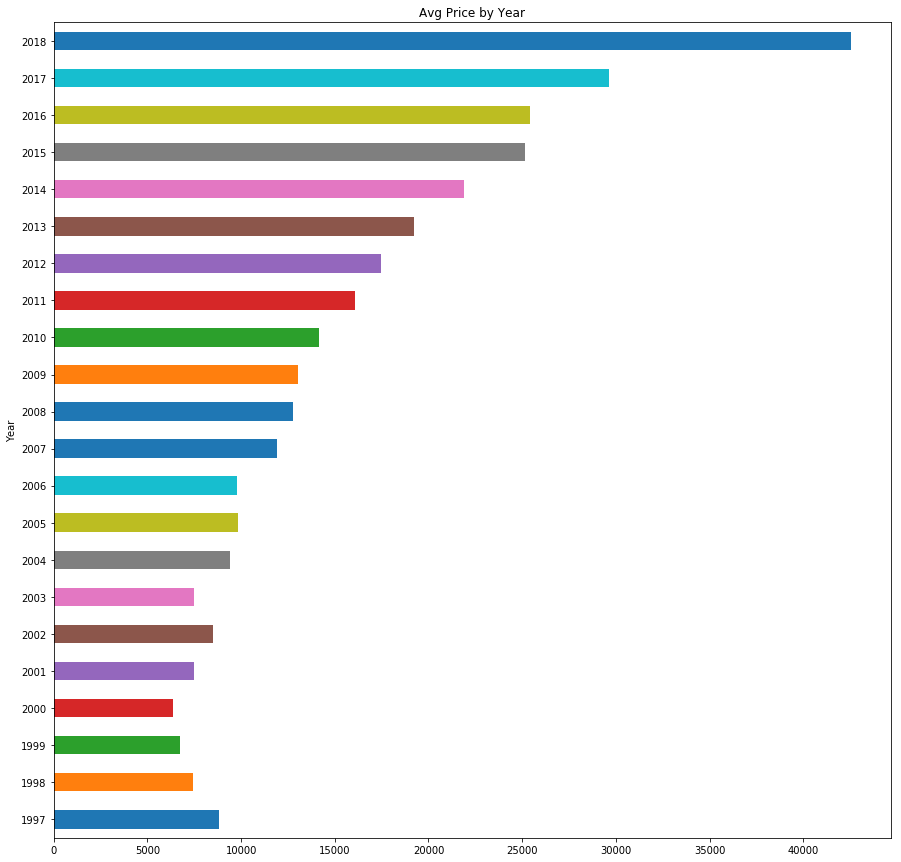

In [17]:
(cars_df.groupby("Year").Price.mean().plot
    .barh(figsize=(15,15), title="Avg Price by Year"))

We can see from the bar graph that newer cars in the data set appear to be more expensive than the older cars in the data set! With that, we can say that the newer a car is, the higher it may be valued (in terms of price).

# Question 3 (4 points)

Restrict to top 10 makes (i.e., the 10 makes that appeared the most times) in this data set. Make a graphic that shows how the average price of each make of car changed by year. Your graphic should make it just as easy to compare the different makes as the different years. Explain what you see.

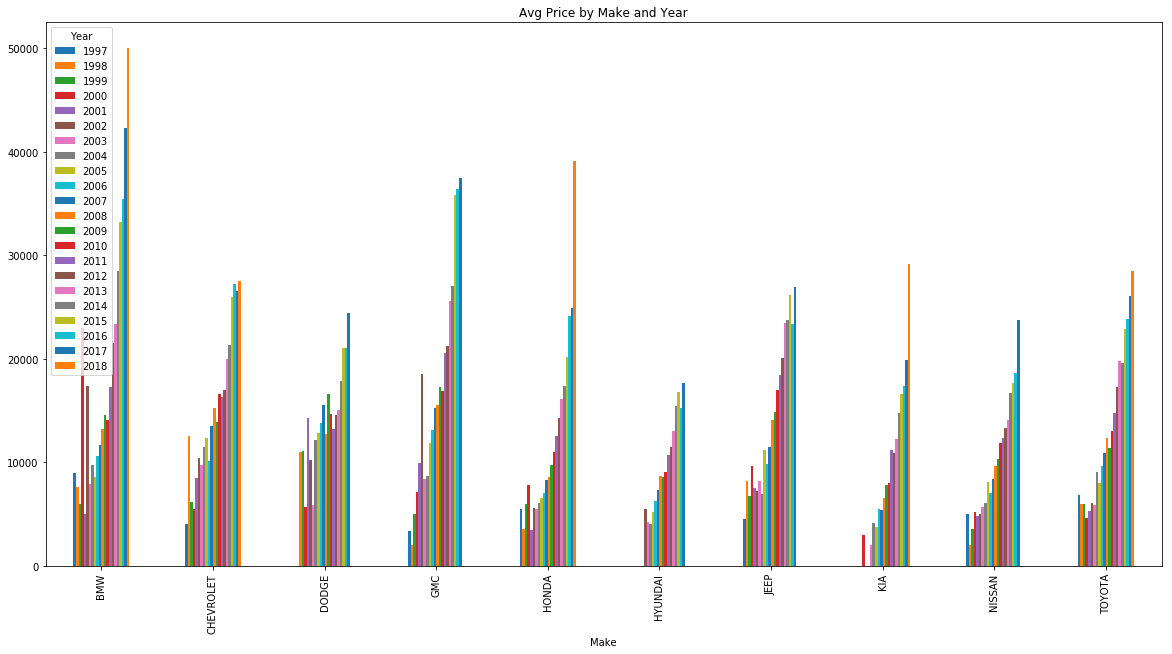

In [18]:
top_10_makes = cars_df[cars_df.Make.isin(
    cars_df["Make"].value_counts().index[1:11])]
 
(top_10_makes.pivot_table(
    index="Make", columns="Year",
    values="Price", aggfunc=np.mean)
     .plot.bar(figsize=(20,10), title="Avg Price by Make and Year"))

From the graphic, we can see that all car makes did in fact increase in price as the year increased. We can also see that BMW's have gotten much more expensive over the years (and GMC to a lesser extent), while Hyundai's have increased very moderately. Honda (and Kia) seem to have spiked in 2018 from 2017. 

# Question 4 (4 points)

I recently learned the stereotype that people from Colorado like to drive Subarus. Does this appear to be true? Calculate appropriate conditional distributions to assess this claim.

In [6]:
colorado_cars = cars_df[cars_df["State"] == "CO"]
(colorado_cars["Make"].value_counts() / 
 colorado_cars["Make"].count())

FORD             0.142647
CHEVROLET        0.095588
TOYOTA           0.077941
JEEP             0.075000
NISSAN           0.058088
SUBARU           0.050000
HONDA            0.048529
DODGE            0.038971
GMC              0.037500
HYUNDAI          0.034559
VOLKSWAGEN       0.032353
BMW              0.032353
KIA              0.030147
RAM              0.028676
AUDI             0.028676
ACURA            0.022794
LEXUS            0.020588
CHRYSLER         0.017647
CADILLAC         0.017647
INFINITI         0.017647
MERCEDES-BENZ    0.017647
MAZDA            0.011765
BUICK            0.011029
MITSUBISHI       0.007353
MINI             0.005882
VOLVO            0.005882
LINCOLN          0.005882
LAND             0.004412
PONTIAC          0.002941
FIAT             0.002941
MERCURY          0.002206
PORSCHE          0.002206
SMART            0.002206
HUMMER           0.002206
SATURN           0.002206
MASERATI         0.001471
SCION            0.001471
SUZUKI           0.001471
JAGUAR      

By looking at the distribution of car Makes given that the vehicles were registered in Colorado, we can see that the claim does not hold true. In fact, the most popular car make in Colorado happens to be Ford. Subaru is only the 6th popular, accounting for approximately 5% of the Colorado vehicles in the data set.

# Question 5 (4 points)

Calculate the joint distribution between the year and the 10th digit of the VIN number. What do you notice? Can you explain why this is?

In [7]:
vin_10_digits = cars_df["Vin"].str.get(9)
vin_10_digits

year_vin_counts = pd.crosstab(cars_df.Year, vin_10_digits)
(year_vin_counts.divide(
    year_vin_counts.sum(axis=1), axis=0))

Vin,1,2,3,4,5,6,7,8,9,A,...,D,E,F,G,H,J,V,W,X,Y
Year,,,,,,,,,,,,,,,,,,,,,
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


From looking at the joint distribution of year and 10th digit vin, we can see that there is a correspondence between digit and year of make. For example, a vehicle made in year 2000 would have a 10th-digit vin of Y, while one made it 2018 would have a J. This makes sense because my car was made in 2008, and the 10th digit of its VIN is 8! There are also missing letters, this is because the manufacturers did not want letters, such as i, o, u, or z to be confused to others.

# Question 6 (4 points)

Which states tend to use their cars the most? Calculate the mileage per year of each car in the data set. (_Reminder:_ This data set was collected in 2018.) Then, make a visualization that shows the average mileage per year by state, sorted by state. What do you notice?

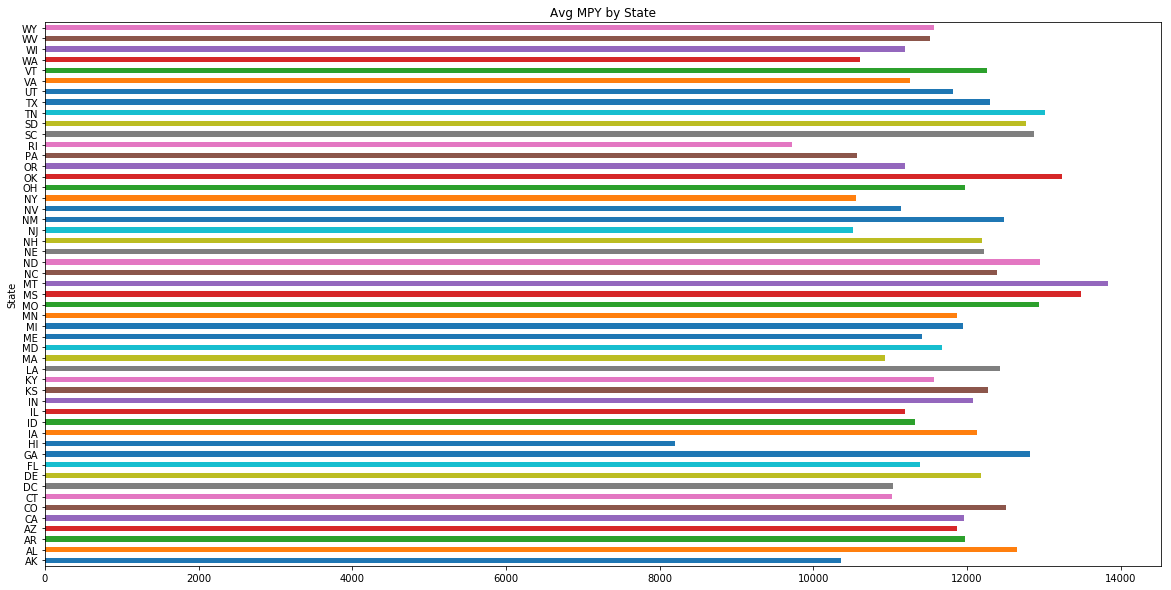

In [19]:
cars_df["MPY"] = cars_df["Mileage"] / (2018 - cars_df["Year"])
cars_df.loc[cars_df["Year"] == 2018, "MPY"] = (
    cars_df[cars_df["Year"] == 2018].Mileage)
(cars_df.groupby("State").MPY.mean()
    .plot.barh(figsize=(20,10), title="Avg MPY by State"))

From the distribution, we can see that the highest average MPY is in Montana, and next is Mississippi. The lowest is Hawaii, and California seems to be pretty average. The distribution does not appear to have any sort of skew (when sorted by State).

# Question 7 (4 points)

Suppose you are moving from San Luis Obispo to Houston, TX. You put your 2005 Porsche on sale (observation 8111 in the `DataFrame`) and would like to find a similar used car in Houston. Which car on sale in Houston is most similar to your current car? Is this car a Porsche?

In [9]:
porsche = cars_df.loc[8111, :][["Price", "Year", "Mileage"]]
tx_cars = cars_df[cars_df.State == "TX"]
houston_cars = tx_cars[tx_cars.City == "HOUSTON"][["Price", "Year", "Mileage"]]
cars_df.iloc[np.sqrt(((houston_cars - porsche) ** 2).sum(axis=1)).idxmin()]

Price                  33900
Year                    2012
Mileage                52650
City                 HOUSTON
State                     TX
Vin        1GNSKBE0XCR161261
Make               CHEVROLET
Model               TAHOE4WD
MPY                     8775
Name: 41054, dtype: object

I decided that the most important variables when comparing cars were price, year and mileage. These trumped other variables such as make and model, because I decided that those weren't really a consideration, since I was moving to a much lower cost of living place (the median house in SLO is nearly 5x that of Houston). I couldn't afford a porsche any longer!

The Chevrolet Tahoe 4wd was most similar to my current car, based on these metrics.

# Question 8 (4 points)

Make a graphic that shows how the last digits of prices and the last digits of mileages are distributed. Do they appear to be uniformly distributed over the digits 0-9? How do the two distributions compare to each other?

In [10]:
last_digits_price = cars_df.Price.astype(str).str[-1].value_counts()
last_digits_price.sort_index(inplace=True)
last_digits_mileage = cars_df.Mileage.astype(str).str[-1].value_counts()
last_digits_mileage.sort_index(inplace=True)

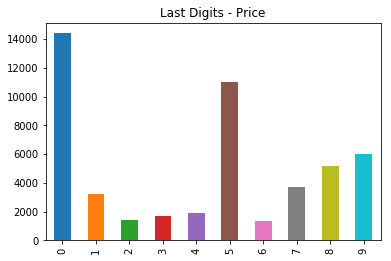

In [20]:
last_digits_price.plot.bar(title="Last Digits - Price")

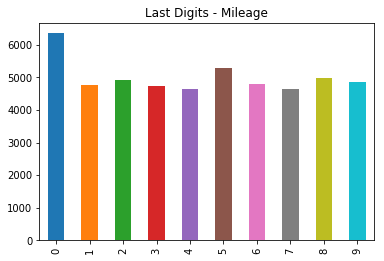

In [21]:
last_digits_mileage.plot.bar(title="Last Digits - Mileage")

The disribution of last digits in the prices of cars does not appear to be uniformly distributed. There is a mucher greater proportion of observations in 0 and 5. However, the distribution of last digits in mileages of cars does in fact appear to be (roughly) uniformly distributed. There does not appear to be a number that dominates the others as 0 and 5 do in the last digits of price distribution.

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your exam as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF [to PolyLearn](https://polylearn.calpoly.edu/AY_2018-2019/mod/assign/view.php?id=319390).